In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../../aaai18/code/')
from common import *

In [3]:
pred = pickle.load(open('./results/pred_all_loo.pkl', 'r'))
pred_single = pickle.load(open('./results/pred_single_loo.pkl', 'r'))

In [5]:
source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static('Austin', 2014, 1, 13)

In [6]:
test_index = {}
for i in range(50):
    
    test_df = source_df.iloc[[i]]
    train_df = source_df.drop(source_df.index[[i]])
    
    train_index = train_df.index
    test_index[i] = test_df.index

In [12]:
out= {}

for iteration in range(10):
    print iteration
    out[iteration] = {}
    for appliance in APPLIANCES_ORDER[1:]:
        s = pd.concat(pred[iteration][appliance])
        print appliance
        try:
            if appliance=="hvac":
                out[iteration][appliance] = compute_rmse_fraction(appliance,s[range(4, 10)], 'Austin')[2]
            else:   
                out[iteration][appliance] = compute_rmse_fraction(appliance, s, 'Austin')[2]
        except Exception, e:
            print (e)

0
hvac
fridge
mw
dw
wm
oven
1
hvac
fridge
mw
dw
wm
oven
2
hvac
fridge
mw
dw
wm
oven
3
hvac
fridge
mw
dw
wm
oven
4
hvac
fridge
mw
dw
wm
oven
5
hvac
fridge
mw
dw
wm
oven
6
hvac
fridge
mw
dw
wm
oven
7
hvac
fridge
mw
dw
wm
oven
8
hvac
fridge
mw
dw
wm
oven
9
hvac
fridge
mw
dw
wm
oven


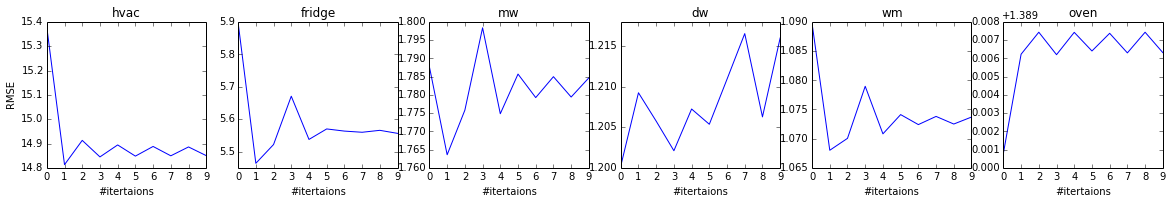

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 3))
ax = axes.flatten()
count = 0

mean_out = pd.DataFrame(out)
for appliance in APPLIANCES_ORDER[1:]:
    try:
        mean_out.T[appliance].plot(ax = ax[count], title=appliance)

        ax[count].set_xlabel("#itertaions")
        count += 1
    except Exception, e:
        print "no gt"
        count += 1
ax[0].set_ylabel("RMSE")
# ax[count-1].legend(['with', 'without', 'app'], loc='center left')
# plt.suptitle("appliance RMSE for 6 test homes")
fig.subplots_adjust(top=0.8)
plt.savefig("./figures/appliance-RMSE.pdf", format='pdf')

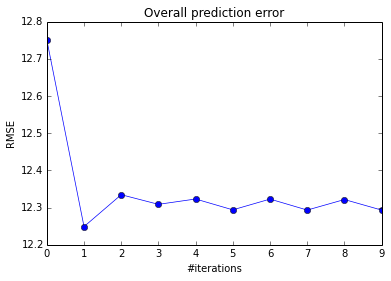

In [19]:
fig, ax = plt.subplots()
error = {}
error = (mean_out.T*pd.Series(contri['Austin'])).sum(axis=1)
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])


ax.set_xlabel("#iterations")
ax.set_ylabel("RMSE")
ax.set_title("Overall prediction error")

plt.savefig("./figures/overall-RMSE.pdf", format='pdf')